In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras import layers, callbacks
import math
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FTSA/data/AAPLweekly.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,19.845715,19.893929,19.057142,19.287144,17.080315,1356972400
1,2014-01-08,19.243214,19.530714,18.924286,19.513929,17.281153,1553708800
2,2014-01-15,19.768572,20.007143,19.282143,19.609644,17.365915,1376183200
3,2014-01-22,19.675358,19.903214,17.931070,18.089287,16.019512,2832981200
4,2014-01-29,17.998215,18.195000,17.626785,18.171070,16.091936,2424254000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       431 non-null    object 
 1   Open       431 non-null    float64
 2   High       431 non-null    float64
 3   Low        431 non-null    float64
 4   Close      431 non-null    float64
 5   Adj Close  431 non-null    float64
 6   Volume     431 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 23.7+ KB


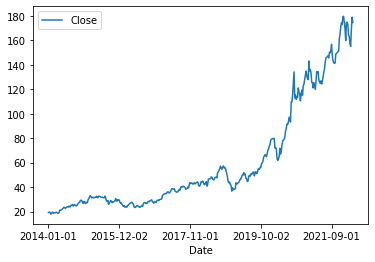

In [ ]:
data.plot('Date','Close')

In [ ]:
tf.random.set_seed(200)

In [ ]:
# 1. Filter out the closing market price data
close_data = data.filter(['Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 80% of the data
training_data_len = math.ceil(len(dataset) *.8)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [ ]:
# Create LSTM Model
def createLSTM():
  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
  model.add(LSTM(units=50, return_sequences=False))
  model.add(Dense(units=25))
  model.add(Dense(units=1))
  model.compile(optimizer='adam', loss='mse')
  return model

# Create GRU model
def createGRU():
  model = Sequential()
  model.add(GRU (units = 50, return_sequences = True, input_shape = (x_train_data2.shape[1],1)))  
  model.add(LSTM(units=50, return_sequences=False))
  model.add(Dense(units=25))
  model.add(Dense(units=1))
  model.compile(optimizer='adam',loss='mse')   
  return model

# Create BiLSTM model
def createBiLSTM():
  model = Sequential()
  model.add(Bidirectional(LSTM(units=50, return_sequences=True),input_shape=(x_train_data2.shape[1],1)))
  model.add(LSTM(units=64, return_sequences=False))
  model.add(Dense(units=25))
  model.add(Dense(units=1))
  model.compile(optimizer='adam',loss='mse')
  return model

In [ ]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience = 10)
    history = model.fit(x_train_data2, y_train_data1, epochs = 10, 
                        validation_split = 0.2,batch_size = 1, callbacks = [early_stop])
    return model,history

In [ ]:
LSTMmodel = createLSTM()
LSTMmodel, LSTMhistory = fit_model(LSTMmodel)

Epoch 1/10
228/228 [==============================] - 17s 53ms/step - loss: 9.2149e-04 - val_loss: 0.0019
Epoch 2/10
228/228 [==============================] - 13s 57ms/step - loss: 3.8919e-04 - val_loss: 0.0015
Epoch 3/10
228/228 [==============================] - 8s 36ms/step - loss: 3.5460e-04 - val_loss: 8.0238e-04
Epoch 4/10
228/228 [==============================] - 5s 22ms/step - loss: 2.8702e-04 - val_loss: 0.0019
Epoch 5/10
228/228 [==============================] - 7s 32ms/step - loss: 2.1623e-04 - val_loss: 6.0285e-04
Epoch 6/10
228/228 [==============================] - 7s 32ms/step - loss: 2.3512e-04 - val_loss: 0.0019
Epoch 7/10
228/228 [==============================] - 8s 33ms/step - loss: 2.1428e-04 - val_loss: 5.4270e-04
Epoch 8/10
228/228 [==============================] - 6s 27ms/step - loss: 2.0617e-04 - val_loss: 0.0021
Epoch 9/10
228/228 [==============================] - 5s 22ms/step - loss: 1.9737e-04 - val_loss: 6.7234e-04
Epoch 10/10
228/228 [================

In [ ]:
GRUmodel = createGRU()
GRUmodel,GRUhistory = fit_model(GRUmodel)

Epoch 1/10
228/228 [==============================] - 8s 25ms/step - loss: 7.9939e-04 - val_loss: 0.0010
Epoch 2/10
228/228 [==============================] - 9s 39ms/step - loss: 2.5208e-04 - val_loss: 7.4756e-04
Epoch 3/10
228/228 [==============================] - 7s 29ms/step - loss: 2.8126e-04 - val_loss: 6.3591e-04
Epoch 4/10
228/228 [==============================] - 8s 34ms/step - loss: 2.5667e-04 - val_loss: 0.0019
Epoch 5/10
228/228 [==============================] - 8s 34ms/step - loss: 1.6036e-04 - val_loss: 4.8616e-04
Epoch 6/10
228/228 [==============================] - 9s 40ms/step - loss: 1.7208e-04 - val_loss: 0.0012
Epoch 7/10
228/228 [==============================] - 8s 34ms/step - loss: 1.7080e-04 - val_loss: 4.1403e-04
Epoch 8/10
228/228 [==============================] - 7s 32ms/step - loss: 1.7598e-04 - val_loss: 0.0026
Epoch 9/10
228/228 [==============================] - 7s 30ms/step - loss: 1.8963e-04 - val_loss: 4.4511e-04
Epoch 10/10
228/228 [==============

In [ ]:
BiLSTMmodel = createBiLSTM()
BiLSTMmodel,BiLSTMhistory = fit_model(BiLSTMmodel)

Epoch 1/10
228/228 [==============================] - 12s 34ms/step - loss: 7.4580e-04 - val_loss: 0.0010
Epoch 2/10
228/228 [==============================] - 7s 29ms/step - loss: 2.3934e-04 - val_loss: 7.2829e-04
Epoch 3/10
228/228 [==============================] - 7s 29ms/step - loss: 2.7378e-04 - val_loss: 6.3860e-04
Epoch 4/10
228/228 [==============================] - 7s 29ms/step - loss: 2.5544e-04 - val_loss: 0.0025
Epoch 5/10
228/228 [==============================] - 8s 33ms/step - loss: 1.6871e-04 - val_loss: 4.7660e-04
Epoch 6/10
228/228 [==============================] - 7s 29ms/step - loss: 1.9072e-04 - val_loss: 0.0019
Epoch 7/10
228/228 [==============================] - 7s 29ms/step - loss: 1.8710e-04 - val_loss: 6.2088e-04
Epoch 8/10
228/228 [==============================] - 7s 29ms/step - loss: 1.8929e-04 - val_loss: 0.0036
Epoch 9/10
228/228 [==============================] - 7s 29ms/step - loss: 1.9304e-04 - val_loss: 7.8510e-04
Epoch 10/10
228/228 [=============

In [ ]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# 3. Making predictions on the testing data
LSTMpredictions = LSTMmodel.predict(x_test)
LSTMpredictions = scaler.inverse_transform(LSTMpredictions)

In [ ]:
# 3. Making predictions on the testing data
GRUpredictions = GRUmodel.predict(x_test)
GRUpredictions = scaler.inverse_transform(GRUpredictions)

In [ ]:
# 3. Making predictions on the testing data
BiLSTMpredictions = BiLSTMmodel.predict(x_test)
BiLSTMpredictions = scaler.inverse_transform(BiLSTMpredictions)

In [ ]:
def loss (history, mName):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(mName + ' Model\'s Train vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')

In [ ]:
  def result(predictions, y_test, mName):
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions

  plt.figure(figsize=(20, 5))
  plt.title(mName+' Model Predictions')
  plt.xlabel('Date')
  plt.ylabel('Close')
  plt.plot(train['Close'])
  plt.plot(valid['Close'])
  plt.plot(valid['Predictions'])
  plt.legend(['Training Set', 'Validation Set', 'Predictions'], loc='upper left')
  plt.show()

  mae = np.mean(np.abs(predictions - y_test)) 
  mpe = np.mean((predictions - y_test)/y_test)*100
  rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
  mape = np.mean(np.abs(predictions - y_test)/np.abs(y_test))*100
  print("MAE: {:.2f}".format(mae))
  print("MPE: {:.2f} %".format(mpe))
  print("RMSE: {:.2f}".format(rmse))
  print("MAPE: {:.2f} %".format(mape))

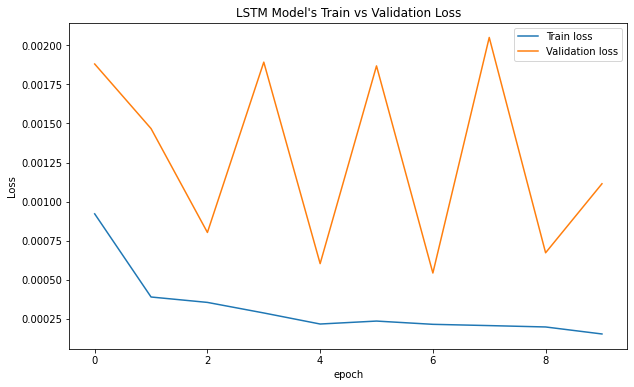

In [ ]:
loss(LSTMhistory, 'LSTM')

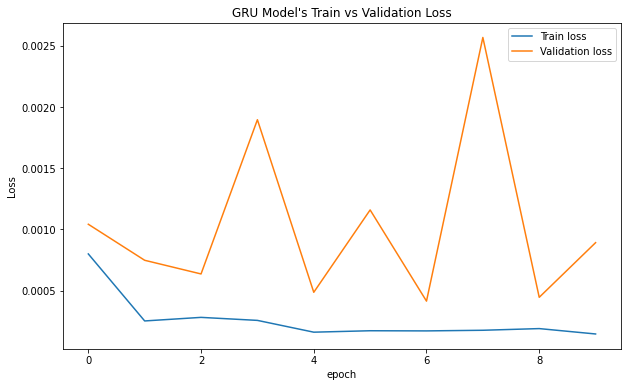

In [ ]:
loss(GRUhistory, 'GRU')

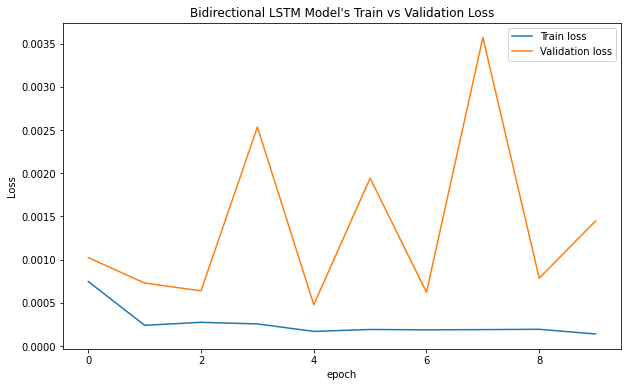

In [ ]:
loss(BiLSTMhistory, 'Bidirectional LSTM')

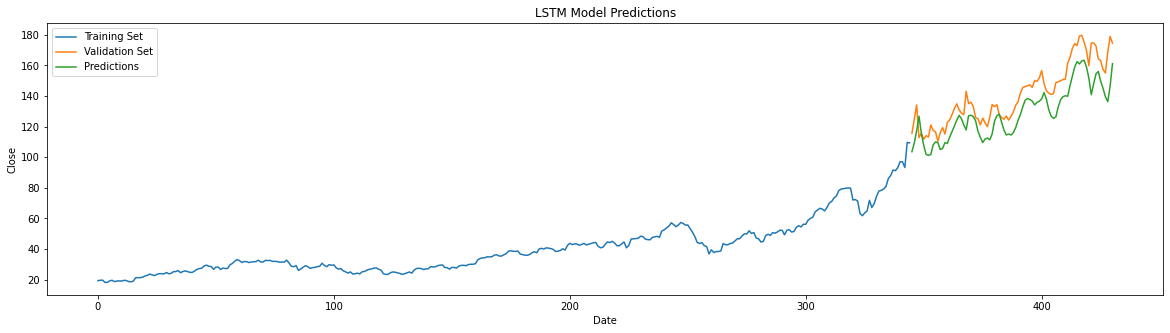

MAE: 12.45
MPE: -8.38 %
RMSE: 14.04
MAPE: 8.68 %


In [ ]:
result(LSTMpredictions,y_test, 'LSTM')

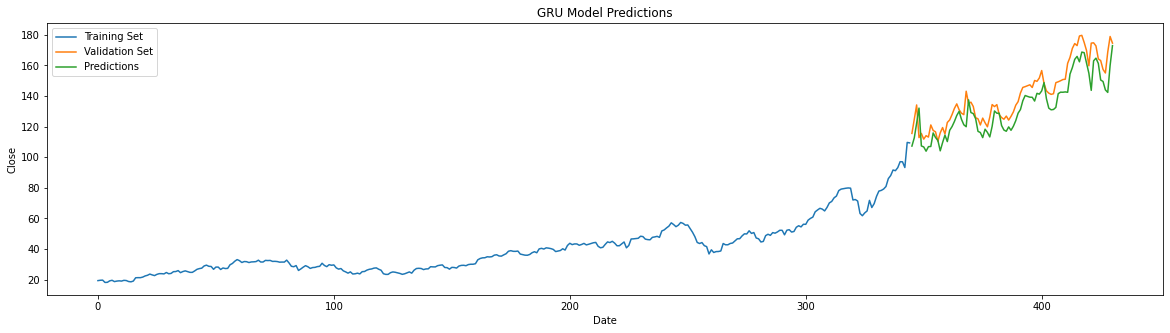

MAE: 8.90
MPE: -5.79 %
RMSE: 10.44
MAPE: 6.27 %


In [ ]:
result(GRUpredictions,y_test,'GRU')

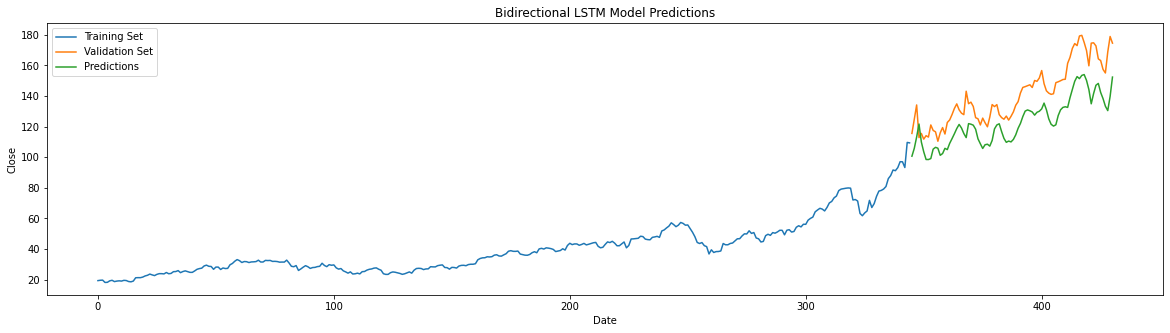

MAE: 18.07
MPE: -12.41 %
RMSE: 19.37
MAPE: 12.59 %


In [ ]:
result(BiLSTMpredictions,y_test,'Bidirectional LSTM')